In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler # Standarization --> standard normal distribution

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
datasets = pd.read_csv("Iris.csv", header=0)

In [3]:
datasets.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
datasets['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
#datasets = datasets.drop("Id", axis=1)

In [7]:
datasets.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# url = []
# email = []
# url_extension = [".ai", ".org", ".com"]
# mail_extension = ["@"]
# a = "Artificial intelligence is intelligence—perceiving, synthesizing, and inferring information—demonstrated by machines, as opposed to intelligence displayed by animals and humans https://deepneuron.ai ahammadmejbah@gmail.com"
# for i in (range(0, 1)):
#     l = a.split(" ")
#     url.append(l[0])
#     email.append(l[1])
    
# print("Url is {} and Email is : {}".format(url, email))

In [9]:
# print(a.split('|'))

In [10]:
# a = []
# b = []

# for i in range(1, 11):
#     if i <= 5:
#         a.append(i)
#         print(a)
#     else:
#         b.append(i)
#         print(b)

In [11]:
# 1. Custom
# 2. Random
# 3. Bult-in Split
# 4. Startified

x_train = []
y_train = []

c = 0
for i in range(0, len(datasets)):
    x_train.append([datasets.values[i, 0],
                    datasets.values[i, 1],
                    datasets.values[i, 2], 
                    datasets.values[i, 3]])
    
    if datasets.values[i, 4]=="Iris-setosa":
        y_train.append([0.0001])
    else:
        y_train.append([0.9999])
    
    #print(i)
    c+=1
print(c)

150


In [12]:
datasets.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
datasets.iloc[0][4]

0.2

In [14]:
# if datasets.values[i, 4]=="Iris-setosa":
#     y_train.append([0])
# elif datasets.values[i, 4]=="Iris-versicolor":
#     y_train.append([1])
# else:
#     y_train.append([2])

In [15]:
print("X train Information: \n{}".format(x_train[:3]))

X train Information: 
[[1, 5.1, 3.5, 1.4], [2, 4.9, 3.0, 1.4], [3, 4.7, 3.2, 1.3]]


In [16]:
print("X Train Shape of the datasets if : {}".format(len(x_train)))
print("Y Train Shape of the datasets if : {}".format(len(y_train)))

X Train Shape of the datasets if : 150
Y Train Shape of the datasets if : 150


In [17]:
# Data Normalization
scaller = StandardScaler()
scaller.fit(x_train)
x_train_scaller = scaller.transform(x_train)

In [18]:
#x_train_scaller

In [19]:
print("X train Information: \n{}".format(x_train[:3]))

X train Information: 
[[1, 5.1, 3.5, 1.4], [2, 4.9, 3.0, 1.4], [3, 4.7, 3.2, 1.3]]


In [20]:
list(datasets.columns)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

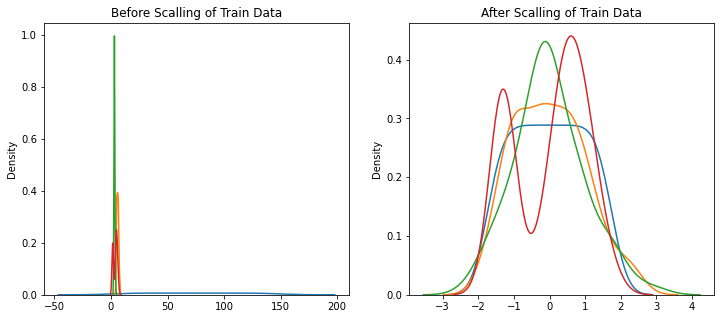

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))
ax1.set_title("Before Scalling of Train Data")
ax2.set_title("After Scalling of Train Data")
datasetsLabels = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in range(0, 4):
    before = []
    after = []
    for beforeRow in x_train:
        before.append(beforeRow[i])
        
    for afterRow in x_train_scaller:
        after.append(afterRow[i])
        
    #print(before)
    #print("after: {}".format(after))
    
    sns.kdeplot(before,ax = ax1, label = datasetsLabels[i])
    sns.kdeplot(after, ax = ax2, label = datasetsLabels[i])
plt.show()

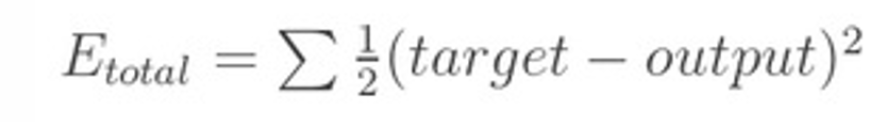

In [22]:
class CustomNeuralNetwork:
    
    def __init__(self, x, y, lr, epoch):
        np.random.seed(100)
        
        
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],6)
        self.weights2 = np.random.rand(6, 1)
        
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.lr = lr
        self.epoch = epoch
        
        self.costInfo = []
        
    @staticmethod    
    def _sigmoid(x):
        return 1.0/ (1 + np.exp(-x))
    @staticmethod
    def _sigmoid_derivative(x): return x*(1-x)
    @staticmethod
    def cost(y_target, y_output):
        return 0.5*(np.sum(np.square(np.subtract(y_target, y_output))))
    
    
    def forward(self):
        #print(np.dot(self.input, self.weights1))
        self.layer1 = self._sigmoid(np.dot(self.input, self.weights1))
        self.output = self._sigmoid(np.dot(self.layer1, self.weights2))
        

    def backPro(self):
        derivative_weights2 = np.dot(self.layer1.T, ((self.y - self.output)* self._sigmoid_derivative(self.output)))
        derivative_weights1 = np.dot(self.input.T, (np.dot((self.y - self.output)* self._sigmoid_derivative(self.output), self.weights2.T)* self._sigmoid_derivative(self.layer1)))
        
        self.weights1 += derivative_weights1 * self.lr
        self.weights2 += derivative_weights2 * self.lr
        
    
    
    def trainDatasets(self):
        for i in range(self.epoch):
            self.forward()
            self.backPro()
            self.costInfo.append(self.cost(self.y, self.output))
            
            
    def predict(self, input_data):
        self.input = input_data
        self.forward()
        return self.output

In [23]:
#np.array(y_train)

In [41]:
# print(np.random.rand(1,4)*50)
# print(np.random.rand(1,4)*50)
# print(np.random.rand(1,4)*50)
# print(np.random.rand(1,4)*50)

[[29.94216885 30.19022695  5.25738427 19.09717225]]
[[ 1.82380283 44.52057817 49.04604285  2.99709944]]
[[44.52729724 28.84507497 37.12398445 31.50919682]]
[[29.09210962  1.0219566  10.50132888 27.23424391]]


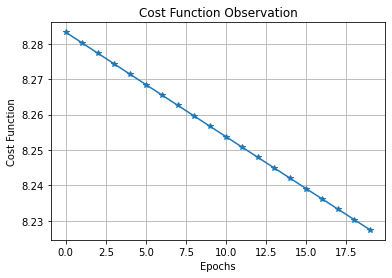

                29.94216885                 30.19022695                 5.25738427                 19.09717225    [0.83640455]    Iris-versicolor
                1.82380283                 44.52057817                 49.04604285                 2.99709944    [0.83640492]    Iris-versicolor
                44.52729724                 28.84507497                 37.12398445                 31.50919682    [0.83640492]    Iris-versicolor
                29.09210962                 1.0219566                 10.50132888                 27.23424391    [0.81476588]    Iris-versicolor
Output:  [[0.83640455]
 [0.83640492]
 [0.83640492]
 [0.81476588]]
Classinforation: ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


In [46]:
if __name__ == "__main__":
    nn = CustomNeuralNetwork(x = x_train_scaller, y = np.array(y_train), 
                            lr = 0.00003, epoch=20)
    nn.trainDatasets()
    
    
    epochsInfor = []
    for i in range(0, len(nn.costInfo)):
        epochsInfor.append(i)
        
    plt.plot(epochsInfor, nn.costInfo, marker = '*')
    plt.xlabel("Epochs")
    plt.ylabel("Cost Function")
    plt.title("Cost Function Observation")
    plt.grid()
    plt.show()
    
    
    x_test = [[29.94216885, 30.19022695,  5.25738427, 19.09717225],
             [1.82380283  ,44.52057817 ,49.04604285 , 2.99709944],
             [44.52729724 ,28.84507497 ,37.12398445 ,31.50919682],
             [29.09210962 , 1.0219566  ,10.50132888 ,27.23424391]]

    x_test_scalling = scaller.transform(x_test)
    out = nn.predict(x_test_scalling)
    

    classInformation =[]

    for i in range(0, len(x_test_scalling)):
        if out[i] <= 0.8:
            classInformation.append("Iris-setosa")
        elif out[i]>0.3 and out[i]<0.6:
             classInformation.append("Iris-verginica")
        else:
            classInformation.append("Iris-versicolor")
        
        print("               ",x_test[i][0],"               ",x_test[i][1], "               ", x_test[i][2], "               ", x_test[i][3],"  ", out[i], "  ", classInformation[i])
    
    print("Output: ", out)
    print("Classinforation: {}".format(classInformation))

In [47]:
len("               ")

15